In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

import warnings
warnings.filterwarnings("ignore")

## Acquire

In [2]:
df = acquire.get_zillow_data()
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,...,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [3]:
acquire.summarize(df)

----------------------------------------------------
DataFrame Head
   parcelid  typeconstructiontypeid  storytypeid  propertylandusetypeid  \
0  14297519                     NaN          NaN                  261.0   
1  17052889                     NaN          NaN                  261.0   
2  14186244                     NaN          NaN                  261.0   

   heatingorsystemtypeid  buildingclasstypeid  architecturalstyletypeid  \
0                    NaN                  NaN                       NaN   
1                    NaN                  NaN                       NaN   
2                    NaN                  NaN                       NaN   

   airconditioningtypeid       id  basementsqft  ...  censustractandblock  \
0                    NaN  1727539           NaN  ...         6.059063e+13   
1                    NaN  1387261           NaN  ...         6.111001e+13   
2                    NaN    11677           NaN  ...         6.059022e+13   

   logerror  transact

### Takeaways

## Prepare

In [4]:
df.shape

(77574, 68)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77574 entries, 0 to 77573
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77574 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   propertylandusetypeid         77574 non-null  float64
 4   heatingorsystemtypeid         49569 non-null  float64
 5   buildingclasstypeid           15 non-null     float64
 6   architecturalstyletypeid      206 non-null    float64
 7   airconditioningtypeid         25006 non-null  float64
 8   id                            77574 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77574 non-null  float64
 11  bedroomcnt                    77574 non-null  float64
 12  buildingqualitytypeid         49808 non-null  float64
 13  c

In [6]:
# set index to parcelid
df.set_index('parcelid', drop=True, inplace=True)
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,bathroomcnt,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
parcelid,,,,,,,,,,,,,,,,,,,,,
14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,3.0,...,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [7]:
# filter by propertylandusetypeid
df = df[df.propertylandusetypeid == 261]
df.shape

(52438, 67)

In [8]:
prepare.miss_dup_values(df)

Your selected dataframe has 67 columns.
There are 52 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
finishedsquarefeet13,52438,100.0
buildingclasstypeid,52438,100.0
buildingclassdesc,52438,100.0
finishedsquarefeet15,52438,100.0
storydesc,52391,99.9
basementsqft,52391,99.9
storytypeid,52391,99.9
yardbuildingsqft26,52375,99.9
architecturalstyletypeid,52368,99.9
architecturalstyledesc,52368,99.9


In [9]:
df.shape

(52438, 67)

In [10]:
# drop columns and rows with missing values
df = prepare.handle_missing_values(df)
df.shape

(52359, 33)

In [11]:
# create columns for counties
df = prepare.get_counties(df)
df.head().T

parcelid,14297519,17052889,14186244,12177905,12095076
propertylandusetypeid,261,261,261,261,261
heatingorsystemtypeid,NaN,NaN,NaN,2,2
id,1727539,1387261,11677,2288172,781532
bathroomcnt,3.5,1,2,3,3
bedroomcnt,4,2,3,4,4
buildingqualitytypeid,NaN,NaN,NaN,8,9
calculatedbathnbr,3.5,1,2,3,3
calculatedfinishedsquarefeet,3100,1465,1243,2376,2962
finishedsquarefeet12,3100,1465,1243,2376,2962
fips,6059,6111,6059,6037,6037


In [12]:
# create feature for analysis
df = prepare.create_features(df)
df.head().T

parcelid,14297519,17052889,14186244,12177905,12095076
propertylandusetypeid,261,261,261,261,261
heatingorsystemtypeid,NaN,NaN,NaN,2,2
id,1727539,1387261,11677,2288172,781532
bathroomcnt,3.5,1,2,3,3
bedroomcnt,4,2,3,4,4
buildingqualitytypeid,NaN,NaN,NaN,8,9
calculatedbathnbr,3.5,1,2,3,3
calculatedfinishedsquarefeet,3100,1465,1243,2376,2962
finishedsquarefeet12,3100,1465,1243,2376,2962
fips,6059,6111,6059,6037,6037


In [13]:
# drop columns with redundant information and unneeded columns
df = df.drop(columns=['propertylandusetypeid', 'heatingorsystemtypeid', 'id', 'buildingqualitytypeid', \
                          'calculatedbathnbr',  'finishedsquarefeet12', 'fullbathcnt', 'lotsizesquarefeet', \
                          'propertycountylandusecode', 'propertyzoningdesc', 'censustractandblock', \
                         'rawcensustractandblock', 'roomcnt', 'unitcnt', 'assessmentyear', 'propertylandusedesc', \
                         'transactiondate', 'heatingorsystemdesc', 'regionidcity', 'regionidzip', 'yearbuilt'])

In [14]:
list(df)

['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'fips',
 'latitude',
 'longitude',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'logerror',
 'LA',
 'Orange',
 'Ventura',
 'age',
 'taxrate',
 'acres',
 'bath_bed_ratio']

In [15]:
df = df.rename(columns={'bathroomcnt': 'bathrooms', 'bedroomcnt': 'bedrooms', 'calculatedfinishedsquarefeet': 'square_feet', \
                        'fips': 'county_code', 'structuretaxvaluedollarcnt': 'building_value', 'taxvaluedollarcnt': 'appraised_value', \
                        'landtaxvaluedollarcnt': 'land_value', 'taxamount': 'taxes'})

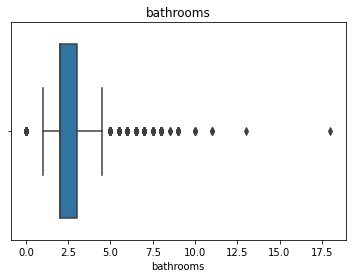

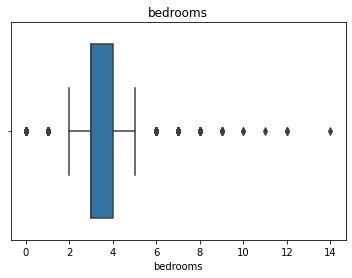

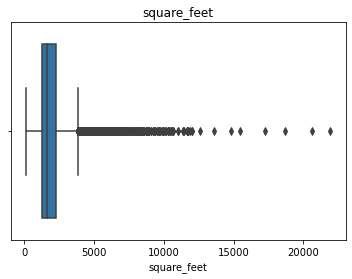

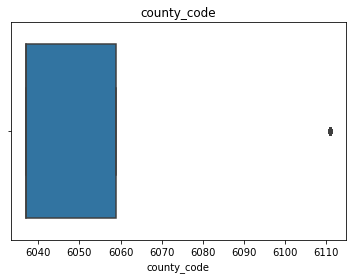

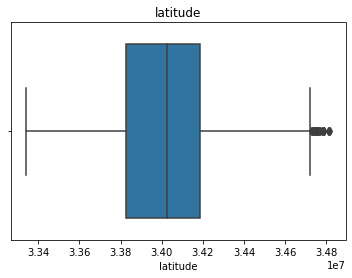

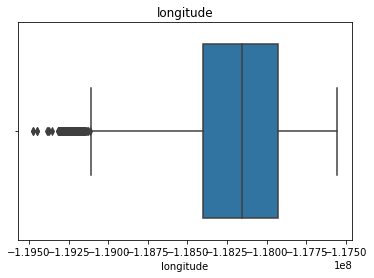

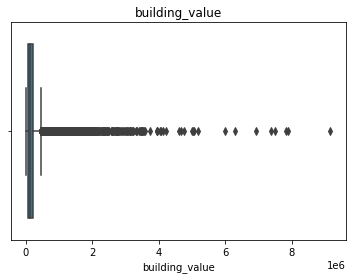

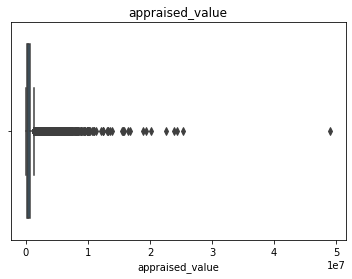

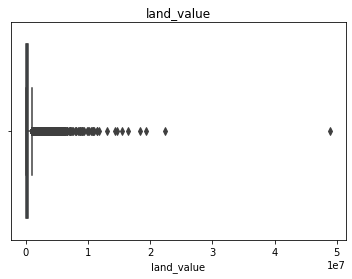

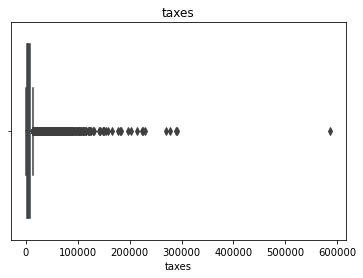

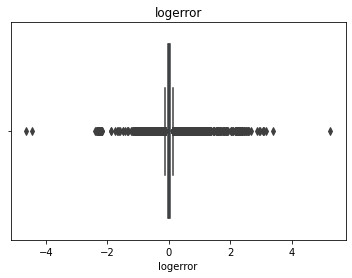

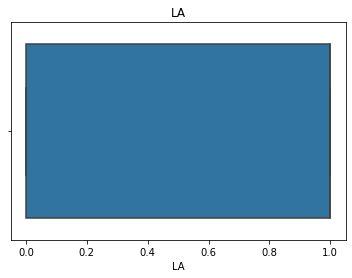

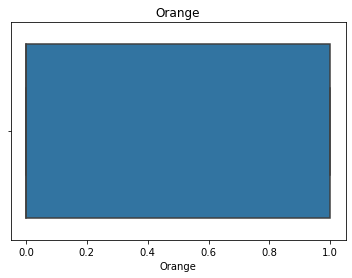

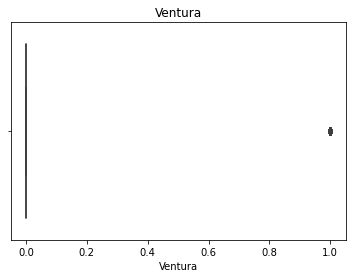

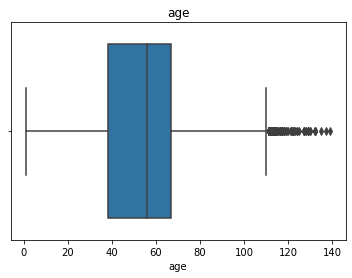

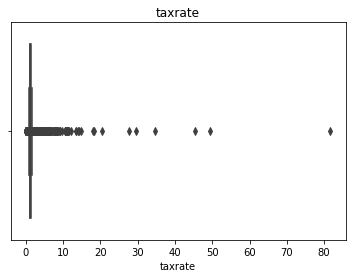

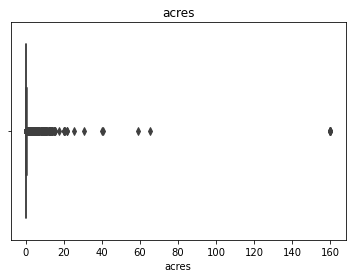

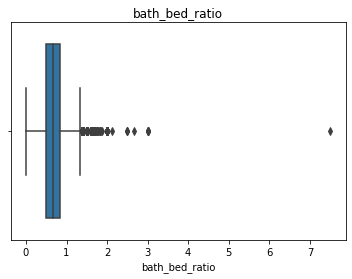

In [16]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [17]:
df.columns

Index(['bathrooms', 'bedrooms', 'square_feet', 'county_code', 'latitude',
       'longitude', 'building_value', 'appraised_value', 'land_value', 'taxes',
       'logerror', 'LA', 'Orange', 'Ventura', 'age', 'taxrate', 'acres',
       'bath_bed_ratio'],
      dtype='object')

In [18]:
# remove outliers
df = df[((df.bathrooms > 0) & (df.bathrooms <= 7) & (df.bedrooms > 0) & (df.bedrooms <= 7) & 
               (df.square_feet < 10000) & (df.acres < 20) & (df.taxrate < 10))]

In [19]:
df.shape

(51749, 18)

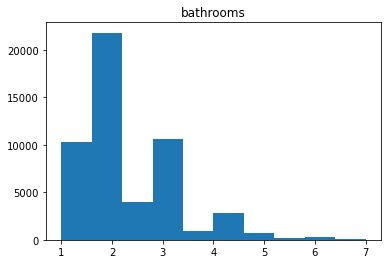

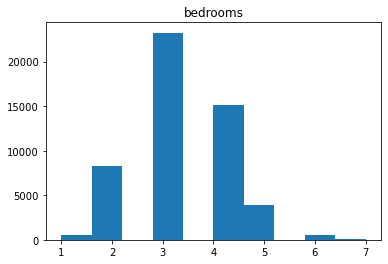

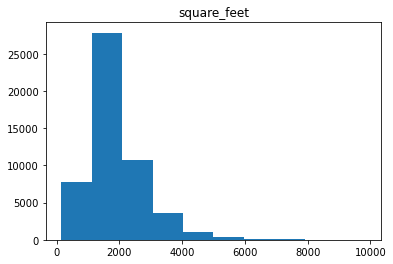

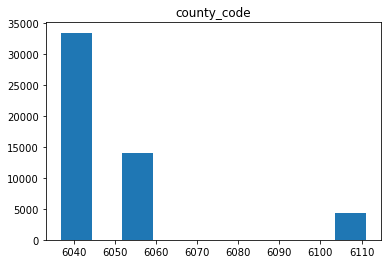

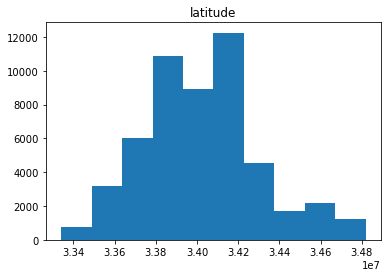

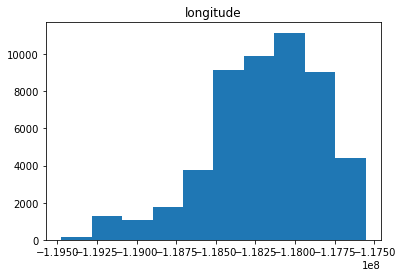

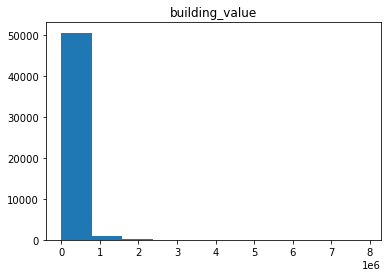

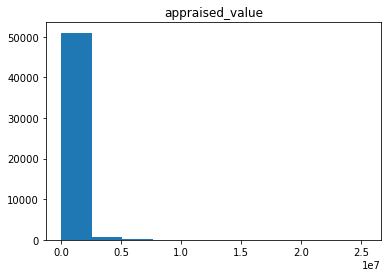

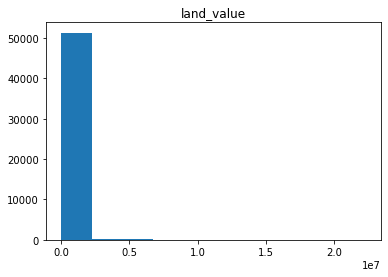

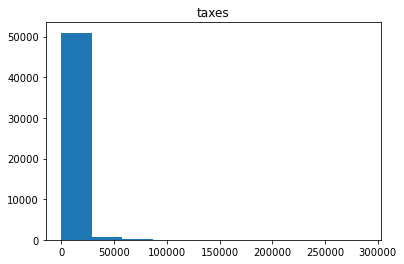

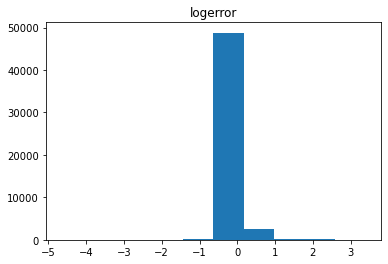

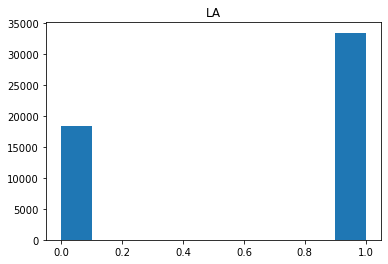

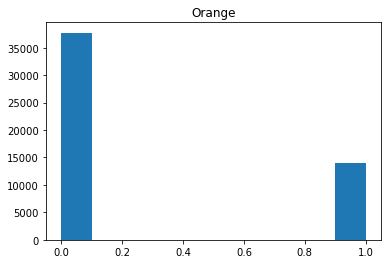

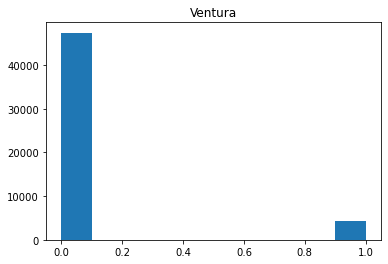

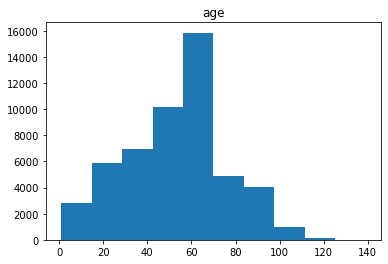

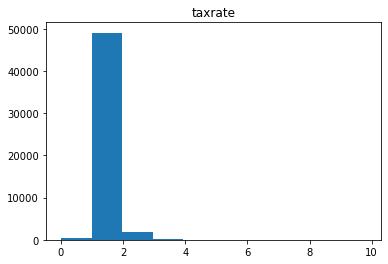

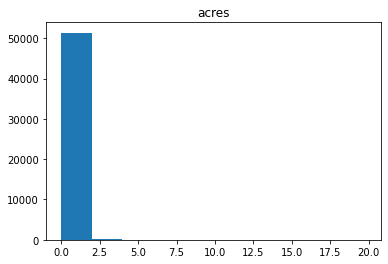

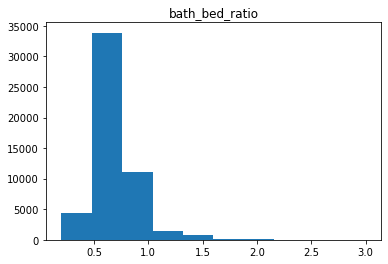

In [20]:
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [21]:
prepare.miss_dup_values(df)

Your selected dataframe has 18 columns.
There are 2 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
building_value,58,0.1
age,28,0.1


In [22]:
# drop any left over nulls
df = df.dropna()

In [23]:
prepare.miss_dup_values(df)

Your selected dataframe has 18 columns.
There are 0 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values


In [24]:
df.shape

(51663, 18)

In [25]:
# split the data
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.split_zillow(df, 'logerror')

In [26]:
train.shape, X_train.shape

((28931, 18), (28931, 17))

## Explore

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28931 entries, 11097148 to 12231217
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        28931 non-null  float64
 1   bedrooms         28931 non-null  float64
 2   square_feet      28931 non-null  float64
 3   county_code      28931 non-null  float64
 4   latitude         28931 non-null  float64
 5   longitude        28931 non-null  float64
 6   building_value   28931 non-null  float64
 7   appraised_value  28931 non-null  float64
 8   land_value       28931 non-null  float64
 9   taxes            28931 non-null  float64
 10  logerror         28931 non-null  float64
 11  LA               28931 non-null  uint8  
 12  Orange           28931 non-null  uint8  
 13  Ventura          28931 non-null  uint8  
 14  age              28931 non-null  float64
 15  taxrate          28931 non-null  float64
 16  acres            28931 non-null  float64
 17  ba

In [28]:
# use RFE to find best features for analysis

X = train[list(train.select_dtypes(exclude='uint8').columns)].drop(columns=['logerror'])
y = train['logerror']

lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=6)
rfe.fit(X, y)

X.columns[rfe.support_]

Index(['bathrooms', 'bedrooms', 'age', 'taxrate', 'acres', 'bath_bed_ratio'], dtype='object')

In [29]:
pd.Series(dict(zip(X.columns, rfe.ranking_))).sort_values()

bathrooms          1
bedrooms           1
age                1
taxrate            1
acres              1
bath_bed_ratio     1
county_code        2
square_feet        3
taxes              4
appraised_value    5
latitude           6
building_value     7
land_value         8
longitude          9
dtype: int64

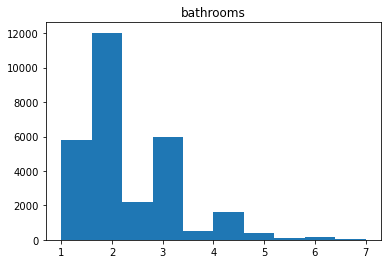

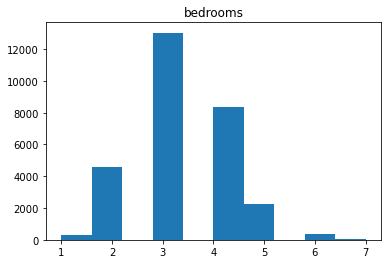

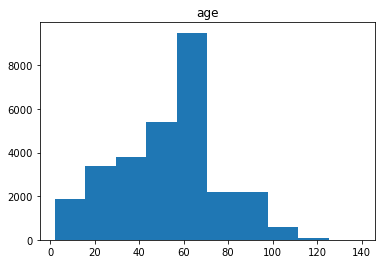

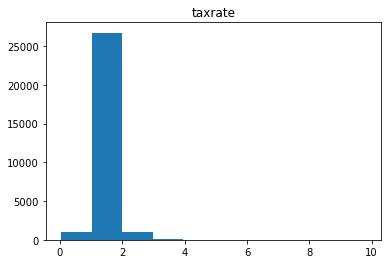

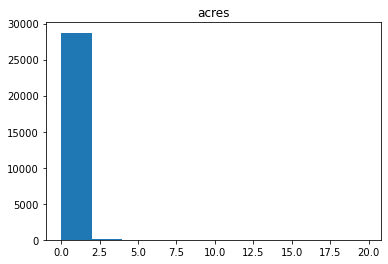

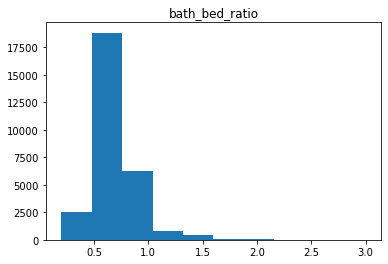

In [30]:
explore = train[['bathrooms', 'bedrooms', 'age', 'taxrate', 'acres', 'bath_bed_ratio']]

for col in explore.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

#### Exploration: the interaction between independent variables and the target variable is explored using visualization and statistical testing

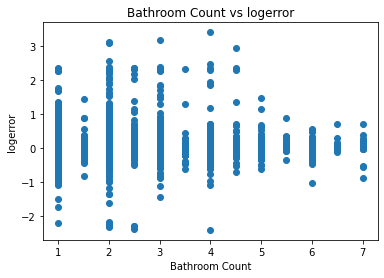

In [31]:
# Question: Does logerror vary across bathrooms?

plt.scatter(train.bathrooms, train.logerror)
plt.xlabel('Bathroom Count')
plt.ylabel('logerror')
plt.title('Bathroom Count vs logerror')
plt.show()

In [32]:
# bin # of bathrooms
train['bathroom_bin'] = pd.cut(train.bathrooms,[1,4,7])

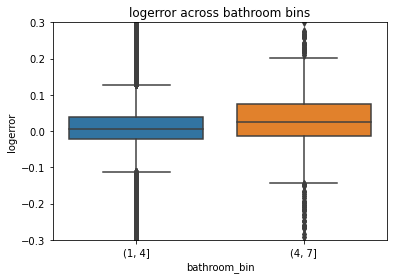

In [33]:
sns.boxplot(train.bathroom_bin, train.logerror)
plt.title('logerror across bathroom bins')
plt.ylim(-0.3, 0.3)
plt.show()

In [34]:
# levene H0 : equal variance across logerror between 4 and under bathrooms group and over 4 bathrooms group
# alpha = 0.05

stats.levene(train[train.bathrooms <= 4].logerror, train[train.bathrooms > 4].logerror)

LeveneResult(statistic=15.439024317101943, pvalue=8.540831402817952e-05)

can reject the null, variance is not equal

In [35]:
# null hypothesis: there is no significant difference in means between 2 and under bathrooms group and over 2 bathrooms group
# alpha = 0.05

stats.ttest_ind(train[train.bathrooms <= 4].logerror, train[train.bathrooms > 4].logerror, equal_var=False)

Ttest_indResult(statistic=-4.19445415274157, pvalue=2.9271418350828597e-05)

can reject the null, there is evidence to support that there is a significant difference in means

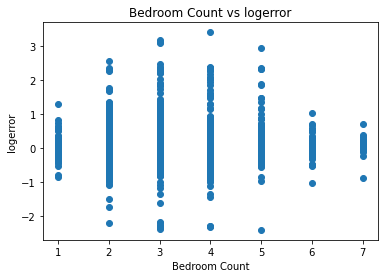

In [36]:
# Question: Is there a relationship between logerror and bedrooms?

plt.scatter(train.bedrooms, train.logerror)
plt.xlabel('Bedroom Count')
plt.ylabel('logerror')
plt.title('Bedroom Count vs logerror')
plt.show()

In [37]:
# bin # of bedrooms
train['bedroom_bin'] = pd.cut(train.bedrooms,[1,4,7])

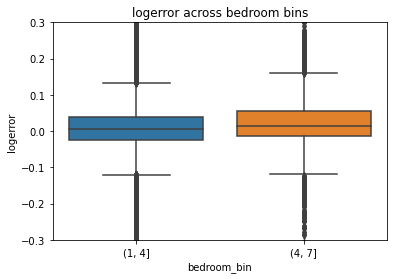

In [38]:
sns.boxplot(train.bedroom_bin, train.logerror)
plt.title('logerror across bedroom bins')
plt.ylim(-0.3, 0.3)
plt.show()

In [39]:
# levene H0 : equal variance across logerror between 4 and under bedrooms group and over 4 bedrooms group
# alpha = 0.05

stats.levene(train[train.bedrooms <= 4].logerror, train[train.bedrooms > 4].logerror)

LeveneResult(statistic=1.918233061499771, pvalue=0.16606225755247614)

cannot reject the null, there is evidence to support that the variance is equal

In [40]:
# null hypothesis: there is no significant difference in means between 4 and under bedrooms group and over 4 bedrooms group
# alpha = 0.05

stats.ttest_ind(train[train.bedrooms <= 4].logerror, train[train.bedrooms > 4].logerror, equal_var=True)

Ttest_indResult(statistic=-4.891773927859521, pvalue=1.004675279420499e-06)

can reject the null, there is evidence to support that there is a significant difference in means

In [41]:
# Question: If we control for acres, does logerror differ across taxes?

train.acres.mean()

0.22757313330197057

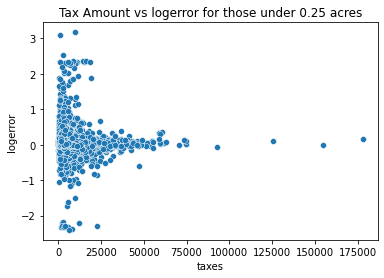

In [42]:
# decided to round acres to 0.25 (1/4 acre lot)
sns.scatterplot(x='taxes', y='logerror', data=train[train.acres <= 0.25])
plt.title('Tax Amount vs logerror for those under 0.25 acres')
plt.show()

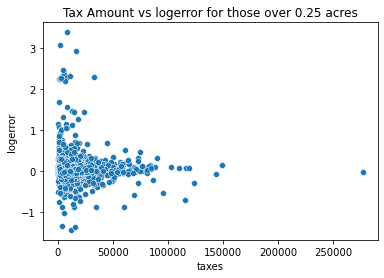

In [43]:
sns.scatterplot(x='taxes', y='logerror', data=train[train.acres > 0.25])
plt.title('Tax Amount vs logerror for those over 0.25 acres')
plt.show()

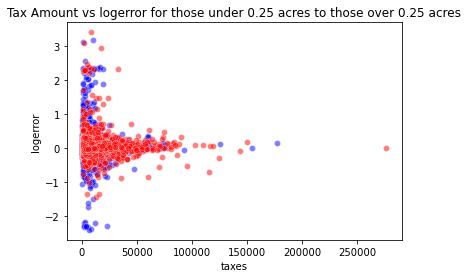

In [44]:
sns.scatterplot(x='taxes', y='logerror', data=train[train.acres <= 0.25], color='blue', alpha=0.5)
sns.scatterplot(x='taxes', y='logerror', data=train[train.acres > 0.25], color='red', alpha=0.5)
plt.title('Tax Amount vs logerror for those under 0.25 acres to those over 0.25 acres')
plt.show()

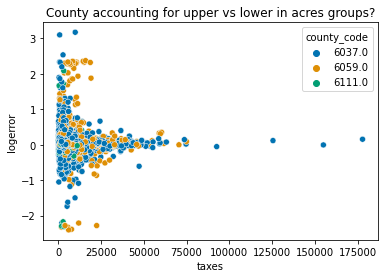

In [45]:
# is this being affected by county?

sns.scatterplot(x='taxes', y='logerror', data=train[train.acres <= 0.25], hue='county_code', palette='colorblind')
plt.title('County accounting for upper vs lower in acres groups?')
plt.show()

#### Exploration: Clustering is used to explore the data. A conclusion, supported by statistical testing and visualization, is drawn on whether or not the clusters are helpful/useful. At least 3 combinations of features for clustering should be tried.

In [46]:
pd.Series(dict(zip(X.columns, rfe.ranking_))).sort_values()

bathrooms          1
bedrooms           1
age                1
taxrate            1
acres              1
bath_bed_ratio     1
county_code        2
square_feet        3
taxes              4
appraised_value    5
latitude           6
building_value     7
land_value         8
longitude          9
dtype: int64

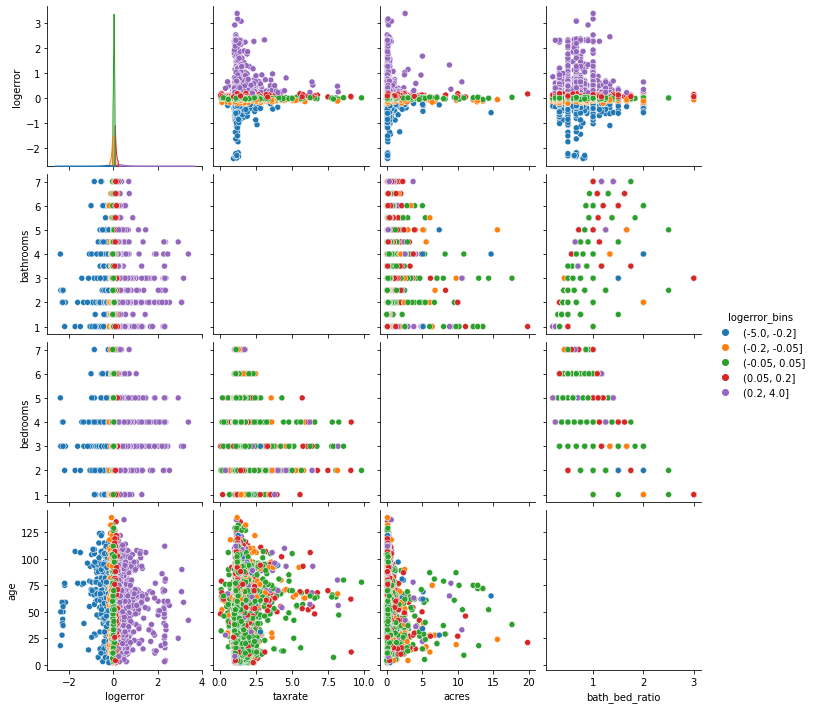

In [47]:
# quick look at the interaction of the top variables
train['logerror_bins'] = pd.cut(train.logerror, [-5, -.2, -.05, .05, .2, 4])

sns.pairplot(data = train, hue = 'logerror_bins', 
             x_vars = ['logerror', 'taxrate','acres', 'bath_bed_ratio'],
             y_vars = ['logerror', 'bathrooms', 'bedrooms', 'age'])

Takeaways:

#### Making Clusters

In [48]:
# make an 'overall_size' cluster
X1 = train[['square_feet', 'acres']]
X1.head()

,square_feet,acres
parcelid,,
11097148,1479.0,0.180005
13904783,1432.0,0.156841
11558242,2844.0,0.133287
11884010,3537.0,0.294605
17258285,496.0,0.137695


In [49]:
# Scale the X
scaler = MinMaxScaler().fit(X1)
X1_scaled = pd.DataFrame(scaler.transform(X1), columns= X1.columns).set_index([X1.index.values])
X1_scaled.head()

,square_feet,acres
11097148,0.123481,0.008472
13904783,0.118559,0.007301
11558242,0.266443,0.006111
11884010,0.339024,0.014265
17258285,0.020528,0.006333


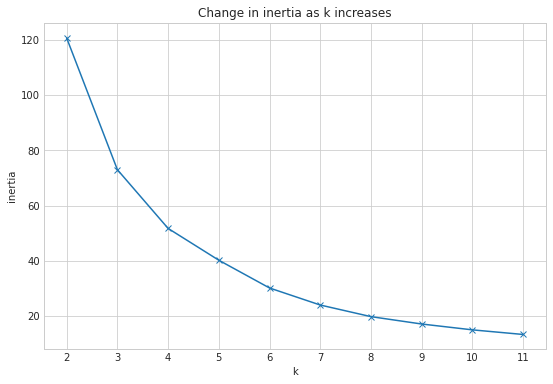

In [50]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X1_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [51]:
# chose to examine 3 clusters

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 1234)

# fit the thing
kmeans.fit(X1_scaled)

# Make a dataframe of centroids
centroids1 = pd.DataFrame(kmeans.cluster_centers_, columns = X1_scaled.columns)

# Use (predict using) the thing 
X1_scaled['cluster'] = kmeans.predict(X1_scaled)
# X1_scaled['cluster'] = 'cluster_' + X1_scaled.cluster.astype(str)
X1_scaled.head()

,square_feet,acres,cluster
11097148,0.123481,0.008472,1
13904783,0.118559,0.007301,1
11558242,0.266443,0.006111,0
11884010,0.339024,0.014265,2
17258285,0.020528,0.006333,1


In [52]:
# make a new column named cluster in X_train, X_validate, X_test and X1_scaled dataframe
# X_train['overall_size'] = kmeans.predict(X_train)
# X_validate['overall_size'] = kmeans.predict(X_validate)
# X_test['overall_size'] = kmeans.predict(X_test)

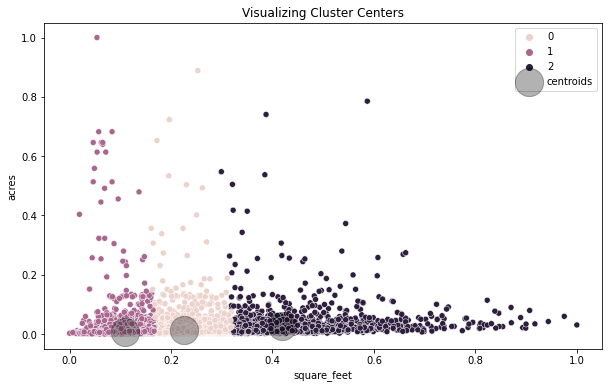

In [53]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(10, 6))

# scatter plot of data with hue for cluster
sns.scatterplot(x='square_feet', y='acres', data=X1_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids1.plot.scatter(x='square_feet', y='acres', ax=plt.gca(), s=800, color='k', alpha=0.3, label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [82]:
# plt.figure(figsize=(10,6))
# sns.boxplot(data=X_train, y='logerror', x='overall_size')
# plt.title('logerror across overall_size clusters')
# plt.ylim(-0.3, 0.3)
# plt.show()

In [74]:
# null: no difference in means between overall_size cluster_0 and overall mean
# alpha = 0.05
t, p = stats.ttest_1samp(train[train.overall_size == 0].logerror, train.logerror.mean())
t, p

AttributeError: 'DataFrame' object has no attribute 'overall_size'

can reject null, there is evidence to support a difference in means

In [60]:
# null: no difference in means between overall_size cluster_1 and overall mean
# alpha = 0.05
t, p = stats.ttest_1samp(train[train.overall_size == 1].logerror, train.logerror.mean())
t, p

(0.6995123999221673, 0.4894479095077371)

cannot reject null, there is no difference in means

In [61]:
# null: no difference in means between overall_size cluster_2 and overall mean
# alpha = 0.05
t, p = stats.ttest_1samp(train[train.overall_size == 2].logerror, train.logerror.mean())
t, p

(-2.8909724998402178, 0.0038452398986544636)

can reject the null, there is evidence to support that there is a difference in means

In [62]:
# null: no difference in means between overall_size cluster_3 and overall mean
# alpha = 0.05
t, p = stats.ttest_1samp(train[train.overall_size == 3].logerror, train.logerror.mean())
t, p

(1.01811316354218, 0.30984807452678315)

cannot reject null, there is no difference in means

In [63]:
# null: no difference in means between overall_size cluster_4 and overall mean
# alpha = 0.05
t, p = stats.ttest_1samp(train[train.overall_size == 4].logerror, train.logerror.mean())
t, p

(0.9003806332746197, 0.36794182008972376)

cannot reject null, there is no difference in means

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28931 entries, 11097148 to 12231217
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   bathrooms        28931 non-null  float64 
 1   bedrooms         28931 non-null  float64 
 2   square_feet      28931 non-null  float64 
 3   county_code      28931 non-null  float64 
 4   latitude         28931 non-null  float64 
 5   longitude        28931 non-null  float64 
 6   building_value   28931 non-null  float64 
 7   appraised_value  28931 non-null  float64 
 8   land_value       28931 non-null  float64 
 9   taxes            28931 non-null  float64 
 10  logerror         28931 non-null  float64 
 11  LA               28931 non-null  uint8   
 12  Orange           28931 non-null  uint8   
 13  Ventura          28931 non-null  uint8   
 14  age              28931 non-null  float64 
 15  taxrate          28931 non-null  float64 
 16  acres            28931 non-nul

In [65]:
# another look at RFE to see when cluster makes the list
X = train[list(train.select_dtypes(exclude=['uint8', 'category']).columns)].drop(columns=['logerror'])
y = train['logerror']

lm = LinearRegression()

rfe = RFE(estimator=lm, n_features_to_select=6)
rfe.fit(X, y)

X.columns[rfe.support_]

Index(['bathrooms', 'bedrooms', 'taxrate', 'acres', 'bath_bed_ratio',
       'overall_size'],
      dtype='object')

In [66]:
# dummy_df = pd.get_dummies(train.overall_size, prefix='overall_size', dummy_na=False, drop_first=False)

# append dummy df cols to the original df. 
# train = pd.concat([train, dummy_df], axis=1)

In [67]:
pd.Series(dict(zip(X.columns, rfe.ranking_))).sort_values()

bathrooms           1
bedrooms            1
taxrate             1
acres               1
bath_bed_ratio      1
overall_size        1
age                 2
county_code         3
square_feet         4
taxes               5
appraised_value     6
latitude            7
building_value      8
land_value          9
longitude          10
dtype: int64

In [54]:
# make a 'age_sqft' cluster
X2 = train[['age', 'square_feet']]
X2.head()

,age,square_feet
parcelid,,
11097148,61.0,1479.0
13904783,62.0,1432.0
11558242,2.0,2844.0
11884010,105.0,3537.0
17258285,82.0,496.0


In [55]:
scaler = MinMaxScaler().fit(X2)
X2_scaled = pd.DataFrame(scaler.transform(X2), columns= X2.columns).set_index([X2.index.values])
X2_scaled.head()

,age,square_feet
11097148,0.430657,0.123481
13904783,0.437956,0.118559
11558242,0.000000,0.266443
11884010,0.751825,0.339024
17258285,0.583942,0.020528


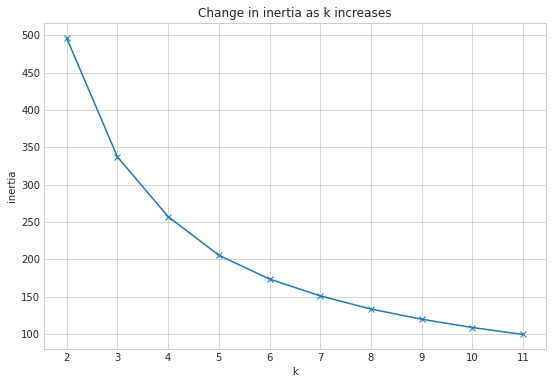

In [56]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X2_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [57]:
# chose 3 clusters

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 1234)

# fit the thing
kmeans.fit(X2_scaled)

# Make a dataframe of centroids
centroids2 = pd.DataFrame(kmeans.cluster_centers_, columns = X2_scaled.columns)

# Use (predict using) the thing 
X2_scaled['cluster'] = kmeans.predict(X2_scaled)
# X2_scaled['cluster'] = 'cluster_' + X2_scaled.cluster.astype(str)
X2_scaled.head()

,age,square_feet,cluster
11097148,0.430657,0.123481,0
13904783,0.437956,0.118559,0
11558242,0.000000,0.266443,1
11884010,0.751825,0.339024,2
17258285,0.583942,0.020528,2


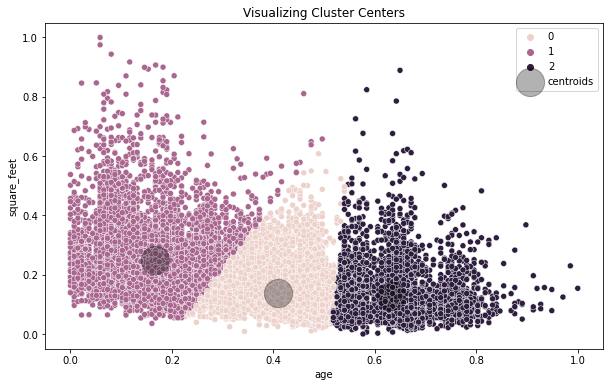

In [58]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(10, 6))

# scatter plot of data with hue for cluster
sns.scatterplot(x='age', y='square_feet', data=X2_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids2.plot.scatter(x='age', y='square_feet', ax=plt.gca(), s=800, color='k', alpha=0.3, label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [108]:
# plt.figure(figsize=(10,6))
# sns.boxplot(data=train, y='logerror', x='age_sqft')
# plt.title('logerror across age_sqft clusters')
# plt.ylim(-0.3, 0.3)
# plt.show()

In [78]:
# null: no difference in means between age_sqft cluster_0 and overall mean
# alpha = 0.05
t, p = stats.ttest_1samp(train[train.age_sqft == 0].logerror, train.logerror.mean())
t, p

(0.3961651921397472, 0.6920027968111404)

cannot reject null, there is no difference in means

In [79]:
# null: no difference in means between age_sqft cluster_1 and overall mean
# alpha = 0.05
t, p = stats.ttest_1samp(train[train.age_sqft == 1].logerror, train.logerror.mean())
t, p

(-3.4089522424410306, 0.0006586107178226683)

can reject null, there is evidence to support a difference in means

In [80]:
# null: no difference in means between age_sqft cluster_2 and overall mean
# alpha = 0.05
t, p = stats.ttest_1samp(train[train.age_sqft == 2].logerror, train.logerror.mean())
t, p

(-0.345107477632961, 0.7300254300013751)

cannot reject null, there is no difference in means

In [81]:
# null: no difference in means between age_sqft cluster_3 and overall mean
# alpha = 0.05
t, p = stats.ttest_1samp(train[train.age_sqft == 3].logerror, train.logerror.mean())
t, p

(-0.0004181458658422758, 0.9996663747052272)

cannot reject null, there is no difference in means

In [82]:
# null: no difference in means between age_sqft cluster_4 and overall mean
# alpha = 0.05
t, p = stats.ttest_1samp(train[train.age_sqft == 4].logerror, train.logerror.mean())
t, p

(4.438400656369496, 9.490652060749963e-06)

can reject null, there is evidence to support a difference in means

In [83]:
X = train[list(train.select_dtypes(exclude=['uint8', 'category']).columns)].drop(columns=['logerror'])
y = train['logerror']

lm = LinearRegression()
# tr = TweedieRegressor()
# ll = LassoLars(alpha=0)

rfe = RFE(estimator=lm, n_features_to_select=6)
rfe.fit(X, y)

X.columns[rfe.support_]

Index(['bathrooms', 'bedrooms', 'taxrate', 'acres', 'bath_bed_ratio',
       'age_sqft'],
      dtype='object')

In [84]:
pd.Series(dict(zip(X.columns, rfe.ranking_))).sort_values()

bathrooms           1
bedrooms            1
taxrate             1
acres               1
bath_bed_ratio      1
age_sqft            1
overall_size        2
county_code         3
age                 4
square_feet         5
taxes               6
appraised_value     7
latitude            8
building_value      9
land_value         10
longitude          11
dtype: int64

In [59]:
# make a 'taxrate_value' cluster
X3 = train[['taxrate', 'appraised_value']]
X3.head()

,taxrate,appraised_value
parcelid,,
11097148,1.307379,129739.0
13904783,1.153144,521000.0
11558242,1.198302,1820000.0
11884010,1.183360,1171478.0
17258285,1.259449,199654.0


In [60]:
scaler = MinMaxScaler().fit(X3)
X3_scaled = pd.DataFrame(scaler.transform(X3), columns= X3.columns).set_index([X3.index.values])
X3_scaled.head()

,taxrate,appraised_value
11097148,0.129330,0.005302
13904783,0.113528,0.021704
11558242,0.118154,0.076157
11884010,0.116623,0.048972
17258285,0.124419,0.008233


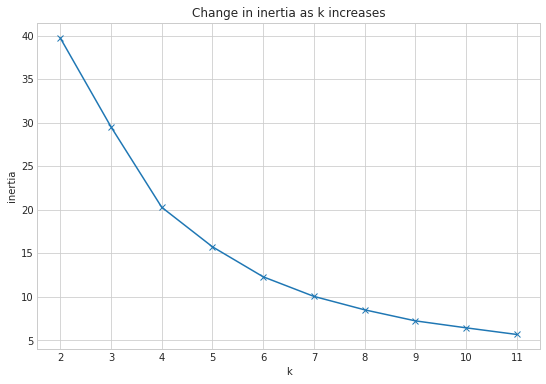

In [61]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X3_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [62]:
# chose 3 clusters

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 1234)

# fit the thing
kmeans.fit(X3_scaled)

# Make a dataframe of centroids
centroids3 = pd.DataFrame(kmeans.cluster_centers_, columns = X3_scaled.columns)

# Use (predict using) the thing 
X3_scaled['cluster'] = kmeans.predict(X3_scaled)
# X3_scaled['cluster'] = 'cluster_' + X3_scaled.cluster.astype(str)
X3_scaled.head()

,taxrate,appraised_value,cluster
11097148,0.129330,0.005302,0
13904783,0.113528,0.021704,0
11558242,0.118154,0.076157,0
11884010,0.116623,0.048972,0
17258285,0.124419,0.008233,0


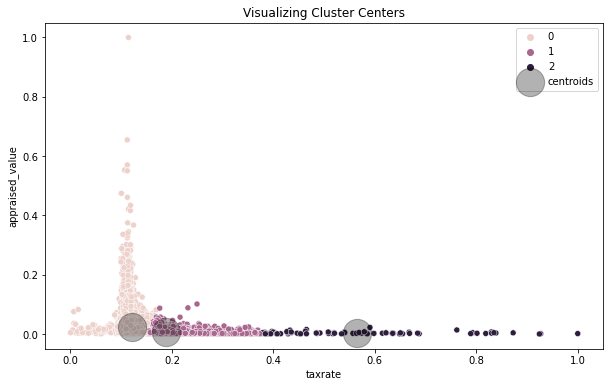

In [63]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(10, 6))

# scatter plot of data with hue for cluster
sns.scatterplot(x='taxrate', y='appraised_value', data=X3_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids3.plot.scatter(x='taxrate', y='appraised_value', ax=plt.gca(), s=800, color='k', alpha=0.3, label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [119]:
# plt.figure(figsize=(10,6))
# sns.boxplot(data=train, y='logerror', x='taxrate_value')
# plt.title('logerror across taxrate_value clusters')
# plt.ylim(-0.3, 0.3)
# plt.show()

In [95]:
# null: no difference in means between taxrate_value cluster_0 and overall mean
# alpha = 0.05
t, p = stats.ttest_1samp(train[train.taxrate_value == 0].logerror, train.logerror.mean())
t, p

(1.3589560136607164, 0.17423892890117443)

cannot reject null, there is no difference in means

In [96]:
# null: no difference in means between taxrate_value cluster_1 and overall mean
# alpha = 0.05
t, p = stats.ttest_1samp(train[train.taxrate_value == 1].logerror, train.logerror.mean())
t, p

(0.48995259783022377, 0.6246813454668532)

cannot reject null, there is no difference in means

In [97]:
# null: no difference in means between taxrate_value cluster_2 and overall mean
# alpha = 0.05
t, p = stats.ttest_1samp(train[train.taxrate_value == 2].logerror, train.logerror.mean())
t, p

(-0.9194919786346362, 0.35784855020772166)

cannot reject null, there is no difference in means

In [98]:
# null: no difference in means between taxrate_value cluster_3 and overall mean
# alpha = 0.05
t, p = stats.ttest_1samp(train[train.taxrate_value == 3].logerror, train.logerror.mean())
t, p

(2.369503894232068, 0.020421121642103066)

can reject null, there is evidence to support a difference in means

In [99]:
# null: no difference in means between taxrate_value cluster_4 and overall mean
# alpha = 0.05
t, p = stats.ttest_1samp(train[train.taxrate_value == 4].logerror, train.logerror.mean())
t, p

(0.3598732401190283, 0.7189664593612304)

cannot reject null, there is no difference in means

In [64]:
# add clusters to train, validate and test dataframes
train['size_clusters'] = X1_scaled['cluster']
train['age_sqft_clusters'] = X2_scaled['cluster']
train['trate_avalue_clusters'] = X3_scaled['cluster']
train.head().T

parcelid,11097148,13904783,11558242,11884010,17258285
bathrooms,2,2,5,3,1
bedrooms,4,3,4,4,1
square_feet,1479,1432,2844,3537,496
county_code,6037,6059,6037,6037,6111
latitude,3.42296e+07,3.38452e+07,3.40292e+07,3.4108e+07,3.42591e+07
longitude,-1.18581e+08,-1.18018e+08,-1.18421e+08,-1.18144e+08,-1.18666e+08
building_value,100291,62063,959300,854439,12469
appraised_value,129739,521000,1.82e+06,1.17148e+06,199654
land_value,29448,458937,860700,317039,187185
taxes,1696.18,6007.88,21809.1,13862.8,2514.54


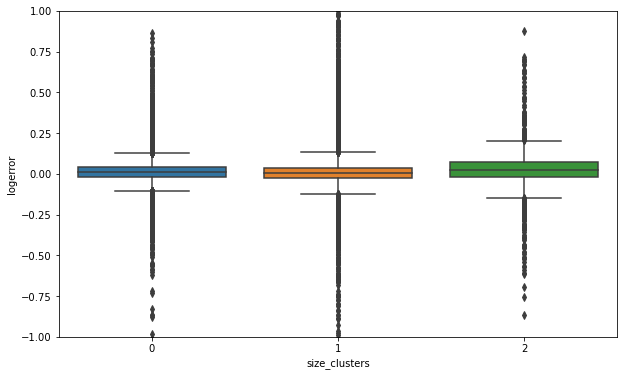

In [70]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train, y='logerror', x='size_clusters')
plt.ylim(-1, 1)
plt.show()

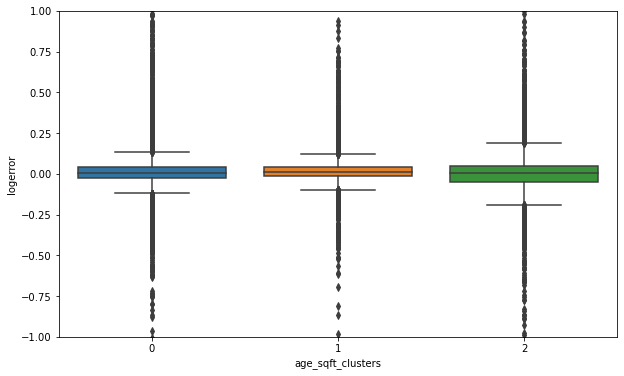

In [71]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train, y='logerror', x='age_sqft_clusters')
plt.ylim(-1, 1)
plt.show()

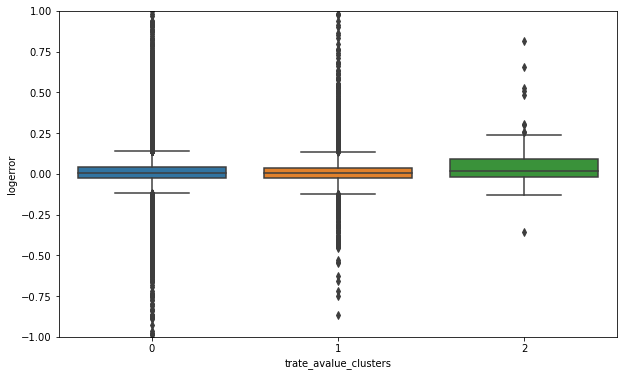

In [72]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train, y='logerror', x='trate_avalue_clusters')
plt.ylim(-1, 1)
plt.show()

## Modeling

In [74]:
train.head().T

parcelid,11097148,13904783,11558242,11884010,17258285
bathrooms,2,2,5,3,1
bedrooms,4,3,4,4,1
square_feet,1479,1432,2844,3537,496
county_code,6037,6059,6037,6037,6111
latitude,3.42296e+07,3.38452e+07,3.40292e+07,3.4108e+07,3.42591e+07
longitude,-1.18581e+08,-1.18018e+08,-1.18421e+08,-1.18144e+08,-1.18666e+08
building_value,100291,62063,959300,854439,12469
appraised_value,129739,521000,1.82e+06,1.17148e+06,199654
land_value,29448,458937,860700,317039,187185
taxes,1696.18,6007.88,21809.1,13862.8,2514.54


In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28931 entries, 11097148 to 12231217
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   bathrooms              28931 non-null  float64 
 1   bedrooms               28931 non-null  float64 
 2   square_feet            28931 non-null  float64 
 3   county_code            28931 non-null  float64 
 4   latitude               28931 non-null  float64 
 5   longitude              28931 non-null  float64 
 6   building_value         28931 non-null  float64 
 7   appraised_value        28931 non-null  float64 
 8   land_value             28931 non-null  float64 
 9   taxes                  28931 non-null  float64 
 10  logerror               28931 non-null  float64 
 11  LA                     28931 non-null  uint8   
 12  Orange                 28931 non-null  uint8   
 13  Ventura                28931 non-null  uint8   
 14  age                    28931

In [78]:
# update datatypes of binned values to be float
X_train = X_train.astype({'overall_size': 'category', 'age_sqft': 'category', 'taxrate_value': 'category'})

In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28931 entries, 14481554 to 12174321
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   bathrooms        28931 non-null  float64 
 1   bedrooms         28931 non-null  float64 
 2   square_feet      28931 non-null  float64 
 3   county_code      28931 non-null  float64 
 4   latitude         28931 non-null  float64 
 5   longitude        28931 non-null  float64 
 6   building_value   28931 non-null  float64 
 7   appraised_value  28931 non-null  float64 
 8   land_value       28931 non-null  float64 
 9   taxes            28931 non-null  float64 
 10  LA               28931 non-null  uint8   
 11  Orange           28931 non-null  uint8   
 12  Ventura          28931 non-null  uint8   
 13  age              28931 non-null  float64 
 14  taxrate          28931 non-null  float64 
 15  acres            28931 non-null  float64 
 16  bath_bed_ratio   28931 non-nul

In [80]:
dummy_df = pd.get_dummies(X_train[['overall_size','age_sqft', 'taxrate_value']], dummy_na=False, drop_first=[True, True, True])

# append dummy df cols to the original df. 
X_train = pd.concat([X_train, dummy_df], axis=1)

In [81]:
X_train.head().T

parcelid,14481554,13088875,14476159,12219282,12398708
bathrooms,3.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00
bedrooms,5.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00
square_feet,3.316000e+03,1.453000e+03,1.818000e+03,1.038000e+03,1.251000e+03
county_code,6.059000e+03,6.037000e+03,6.059000e+03,6.037000e+03,6.037000e+03
latitude,3.360161e+07,3.401328e+07,3.362288e+07,3.394423e+07,3.395837e+07
longitude,-1.175772e+08,-1.178759e+08,-1.176385e+08,-1.182592e+08,-1.181001e+08
building_value,3.557480e+05,1.313560e+05,2.738750e+05,2.423000e+04,9.115400e+04
appraised_value,5.732680e+05,3.925830e+05,3.950830e+05,3.869900e+04,3.374860e+05
land_value,2.175200e+05,2.612270e+05,1.212080e+05,1.446900e+04,2.463320e+05
taxes,6.075360e+03,5.163910e+03,4.016680e+03,7.289300e+02,4.345970e+03


In [ ]:
dummy_df = pd.get_dummies(df[['sex', 'embark_town']], prefix=['sex', 'embark'])
df = pd.concat([df, dummy_df.drop(columns=['sex_male'])], axis=1).drop(columns=['sex', 'embark_town'])

In [82]:
# establish the baseline
y_train = pd.DataFrame({'actual': y_train})
y_train['baseline'] = y_train.actual.mean()
y_train.head()

,actual,baseline
parcelid,,
14481554,0.013065,0.017997
13088875,0.035563,0.017997
14476159,-0.009725,0.017997
12219282,0.436982,0.017997
12398708,0.016274,0.017997
